In [1]:
from converter import PowerElectronicInverter
from simulation import Simulation
from switching import SwitchingSignals
from grid import Grid
import converter_utilities
from scipy.integrate import odeint,ode
import numpy as np
import math
from scipy import signal
from scipy.fftpack import fft
import matplotlib.pyplot as plt

In [2]:
switching1 = SwitchingSignals(50.0)
grid1 = Grid(50.0,50.0)
sim_tf = 0.1
Vdc_rated = 100

In [3]:
inverter1 = PowerElectronicInverter(Vdc=Vdc_rated,model_type = 'average',signal_type='duty_cycle') #'square''switching'


In [4]:
sim1 = Simulation(switching1,inverter1,grid1)
sim1.show_spec()

fswitch:10000.00,Tswitch:0.00010
fmodulating:50.00,Tmodulating:0.02000
ma:1.000,mf:200.000
Model type:average
Switching signal type:duty_cycle
Simulation time step:0.00010


Number of timsteps:1000


C:\Users\splathottam\AppData\Roaming\Python\Python37\site-packages\scipy\integrate\odepack.py:251: ODEintWarning: Integration successful.
  warnings.warn(warning_msg, ODEintWarning)


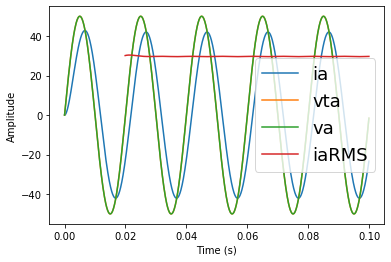

Inverter states:[-1.5705379539063782, 0.0]
iaRMS expected:35.35533905932737,iaRMS simulation:29.68161677477211


In [5]:
sol1 = sim1.simulate_inverter(tf=sim_tf)
#inverter1.show_states()

In [ ]:
inverter1.ia

In [ ]:
sim1.model

In [ ]:
inverter2 = PowerElectronicInverter(Vdc=100,signals=switching1,grid=grid1,signal_type='sinePWM',model_type = 'switching') #'square''switching'
inverter2.show_spec()

In [ ]:
inverter1.iaRMS_t[-1]
inverter2.iaRMS_t

In [ ]:
max(inverter1.ia_t),max(inverter2.ia_t)

In [ ]:
sol2 = inverter2.simulate_inverter(tf=sim_tf)
inverter2.show_states()

In [ ]:
inverter3 = PowerElectronicInverter(Vdc=100,signals=switching1,signal_type='duty_cycle',model_type = 'dynamic_phasor') #'square''switching'
inverter3.show_spec()

In [ ]:
50/math.sqrt(2)

In [ ]:
sol3 = inverter3.simulate_inverter(tf=sim_tf)
inverter3.show_states()

In [ ]:
np.abs(sol3[:,0]+1j*sol3[:,1])/math.sqrt(2)

In [ ]:
sol3y = sol1[:,0]

In [ ]:
n = len(y)
print(np.sqrt((1/n)*np.sum((np.square(y)))))

In [ ]:
squares = np.square(y)
average_of_squares= np.sum(squares)/n
RMS = np.sqrt(average_of_squares)
print(average_of_squares,RMS)

In [ ]:
max(y)/math.sqrt(2),min(y)

In [ ]:
n_1cycle = len(np.arange(0,switching1.Tm,inverter2.dt))
Irms = converter_utilities.calc_RMS(inverter2.ia_t[-n_1cycle:])
        

In [ ]:
np.arange(0,switching1.Tm,inverter2.dt)

In [ ]:
switching1.Tm

In [ ]:
inverter2.ia_t

In [ ]:
len(inverter2.ia_t[-n_1cycle:])